In [2]:
import numpy as np
import sklearn.metrics as metrics
import os

from keras.datasets import cifar10
import keras.callbacks as callbacks
import keras.utils.np_utils as kutils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import pydotplus as pydot
from keras import backend as K

In [3]:
cwd = os.getcwd()

In [4]:
import wide_residual_network as wrn

In [5]:
batch_size = 64
nb_epoch = 10
img_rows, img_cols = 64,64
classes = 1000

In [6]:
#data_folder = cwd + "\\sample_data\\aircraft\\"
data_folder = cwd + "\\sample_data\\catsdogs\\"

In [7]:
train_datagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
valid_datagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
train_generator = train_datagen.flow_from_directory(data_folder + "train", target_size=(img_rows, img_cols),batch_size=batch_size)
valid_generator = valid_datagen.flow_from_directory(data_folder + "val", target_size=(img_rows, img_cols),batch_size=batch_size)

Found 145 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [8]:
init_shape = (3,img_rows, img_cols ) if K.image_dim_ordering() == 'th' else (img_rows, img_cols ,3)

In [9]:
# For WRN-16-8 put N = 2, k = 8
# For WRN-28-10 put N = 4, k = 10
# For WRN-40-4 put N = 6, k = 4
model = wrn.create_wide_residual_network(init_shape, nb_classes=classes, N=4, k=4, dropout=0.0)

#model.summary()
plot_model(model, to_file = "WRN-28-4.png")

Wide Residual Network-22-4 created.


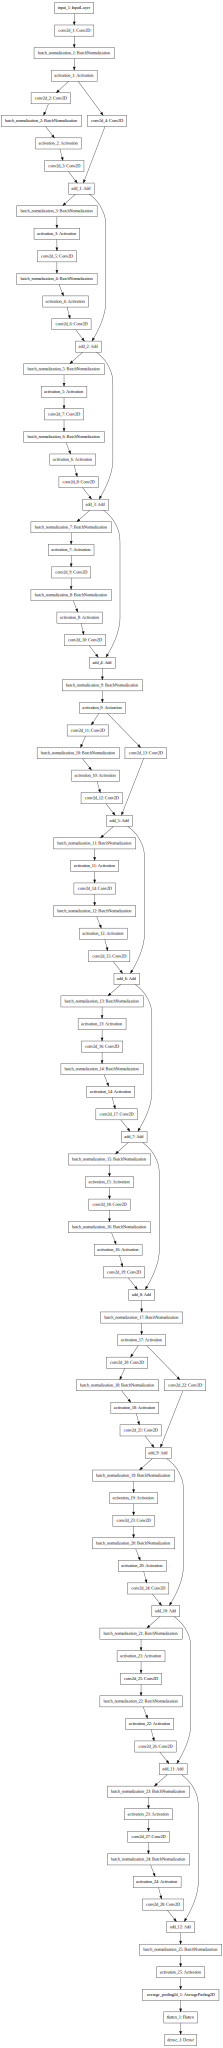

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
print("Finished compiling")
print("Allocating GPU memory")

#model.load_weights("weights/WRN-28-8 Weights.h5")
#print("Model loaded.")

In [ ]:
filepath = "imagenet_wrn_28_4_weights.h5"
#model.fit_generator(generator.flow(trainX, trainY, batch_size=batch_size), steps_per_epoch=len(trainX) // batch_size + 1, nb_epoch=nb_epoch,callbacks = [callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)],validation_data=(testX, testY),validation_steps=testX.shape[0] // batch_size,)

model.fit_generator(train_generator, steps_per_epoch= len(train_generator), validation_data=valid_generator, validation_steps = len(valid_generator), epochs = 5, callbacks = [callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)])